#  Классификация изображений с помощью сверточных нейронных сетей

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://pytorch.org/docs/stable/nn.html#convolution-layers
* https://pytorch.org/vision/0.16/transforms.html#v2-api-reference-recommended
* https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
* https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html
* https://kozodoi.me/blog/20210308/compute-image-stats
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html

## Задачи для совместного разбора

1\. Рассмотрите основные возможности по созданию датасетов из `torchvision` и примеры работы основных слоев для создания сверточных нейронных сетей для анализа изображений.

In [1]:
!pip install torchvision

In [2]:
import torch
import torchvision
import torchvision.transforms.v2 as T

In [3]:
trainset = torchvision.datasets.CIFAR10(
    root="./cifar10",
    download=True,
    train=True,
)

100%|██████████| 170M/170M [00:04<00:00, 38.8MB/s]


Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10


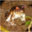

In [5]:
trainset[0][0]

In [9]:
transform = T.Compose([
    T.ToTensor(),
    T.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

trainset = torchvision.datasets.CIFAR10(
    root="./cifar10",
    download=True,
    train=True,
    transform=transform
)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Files already downloaded and verified


In [12]:
trainset[0][0].shape

torch.Size([3, 32, 32])

2\. Реализуйте типовую архитектуру CNN для классификации изображений.

In [41]:
import torch.nn as nn

class CNN(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv_block1 = nn.Sequential(
      nn.Conv2d(
          in_channels=3,
          out_channels=6,
          kernel_size=3,
      ),
      nn.ReLU(),
      nn.MaxPool2d(2, 2),
    )

    self.conv_block2 = nn.Sequential(
      nn.Conv2d(
          in_channels=6,
          out_channels=2,
          kernel_size=3,
      ),
      nn.ReLU(),
      nn.MaxPool2d(2, 2),
    )
    self.classifier = nn.Linear(72, 10)


  def forward(self, X):
    out = self.conv_block1(X)
    out = self.conv_block2(out)

    out = out.flatten(start_dim=1)
    out = self.classifier(out)

    return out

In [42]:
from torch.utils.data import DataLoader

loader = DataLoader(trainset, batch_size=16)
X, y = next(iter(loader))

In [43]:
X.shape

torch.Size([16, 3, 32, 32])

In [44]:
model = CNN()
out = model(X)

In [45]:
out.shape

torch.Size([16, 10])

In [34]:
conv1 = nn.Conv2d(3, 6, (5, 7))
conv1.weight.shape

torch.Size([6, 3, 5, 7])

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Создайте датасет `CatBreeds` на основе данных из архива `cat_breeds_4.zip`. Используя преобразования `torchvision`, приведите картинки к размеру 300х300 и нормализуйте значения интенсивности пикселей (рассчитайте статистику для нормализации отдельно). Выведите на экран количество картинок в датасете,  размер одной картинки, количество уникальных классов. Разбейте датасет на обучающее и тестовое множество в соотношении 80 на 20%.

При расчете статистики для нормализации считайте, что вы можете загрузить весь набор данных в память сразу. Однако рекомендуется реализовать подход для получения статистики на основе батчей, так как такое решение в перспективе может позволить обработать датасет, который не помещается в память целиком.

- [ ] Проверено на семинаре

<p class="task" id="2"></p>

2\. Решите задачу классификации на основе датасета из предыдущего задания, не используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели.   

- [ ] Проверено на семинаре

<p class="task" id="3"></p>

3\. Напишите функцию, которая выбирает несколько изображений из переданного набора данных и выводит их на экран в виде сетки с указанием над ними названия правильного класса и класса, предсказанного моделью. Воспользовавшись данной функцией, выведите прогнозы итоговой модели из предыдущей задачи по 6 случайным картинкам.

```
def show_examples(model, dataset, k=6):
    pass
```

- [ ] Проверено на семинаре

<p class="task" id="4"></p>

4\. Решите задачу классификации на основе датасета из первого задания, используя сверточные слои. Постройте график изменения значения функции потерь на обучающем множестве в зависимости от номера эпохи, графики изменения метрики accuracy на обучающем и тестовом множестве в зависимости от эпохи. Выведите на экран итоговое значение метрики accuracy на обучающем и тестовом множестве. Выведите на экран количество параметров модели. Воспользовавшись функцией из предыдущего задания, выведите прогнозы итоговой модели по 6 случайным картинкам.

Сохраните веса обученной модели на диск.

- [ ] Проверено на семинаре

<p class="task" id="5"></p>

5\. Проанализируйте обученную в предыдущей задаче модель, исследовав обученные ядра сверточных слоев. Выберите одно изображение из тестового набора данных и пропустите через первый сверточный слой модели. Визуализируйте полученные карты признаков.

- [ ] Проверено на семинаре